In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

# Loading Cancer Dataset

In [2]:
cancerdf = load_breast_cancer()

In [3]:
cancerdf.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [4]:
print(cancerdf['DESCR'])

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [5]:
print(cancerdf['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [6]:
cancerdf['data'].shape

(569, 30)

In [7]:
cancerdf = pd.DataFrame(np.c_[cancerdf['data'],cancerdf['target']], columns=np.append(cancerdf['feature_names'], ['target']))

In [8]:
cancerdf.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


# Data Pre-processing

In [9]:
np.where(cancerdf.isnull())

(array([], dtype=int64), array([], dtype=int64))

In [10]:
cancerdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

# Data Visualization 

C:\Users\sohai\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


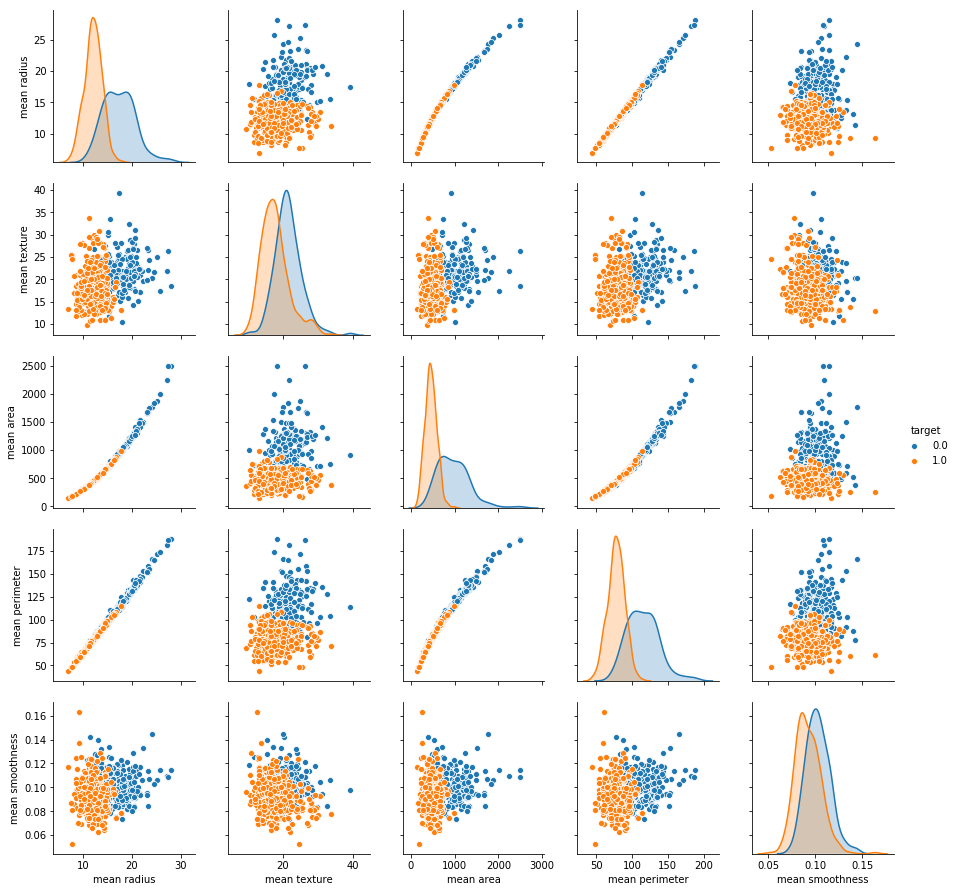

In [11]:
sns.pairplot(cancerdf, vars=['mean radius', 'mean texture', 'mean area', 'mean perimeter','mean smoothness'], hue='target')

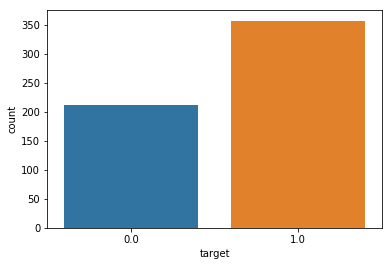

In [12]:
sns.countplot(cancerdf['target'])

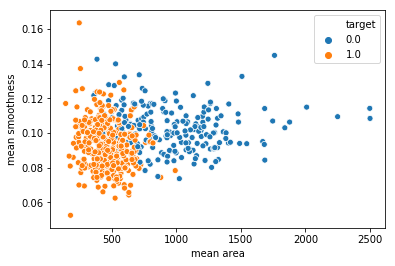

In [67]:
#plt.figure(figsize=[15,8])
sns.scatterplot(data=cancerdf, x='mean area', y='mean smoothness', hue='target')

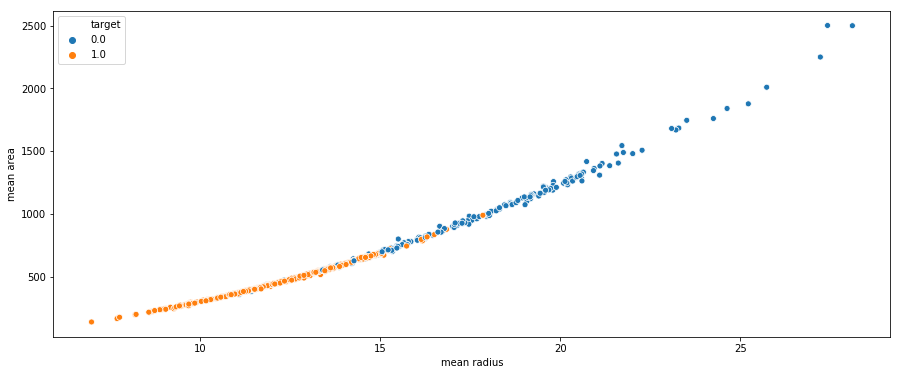

In [72]:
plt.figure(figsize=[15,6])
sns.scatterplot(data=cancerdf, x='mean radius', y='mean area', hue='target')

In [74]:
#sns.countplot(data=cancerdf, x='mean radius')

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5]),
 <a list of 31 Text xticklabel objects>)

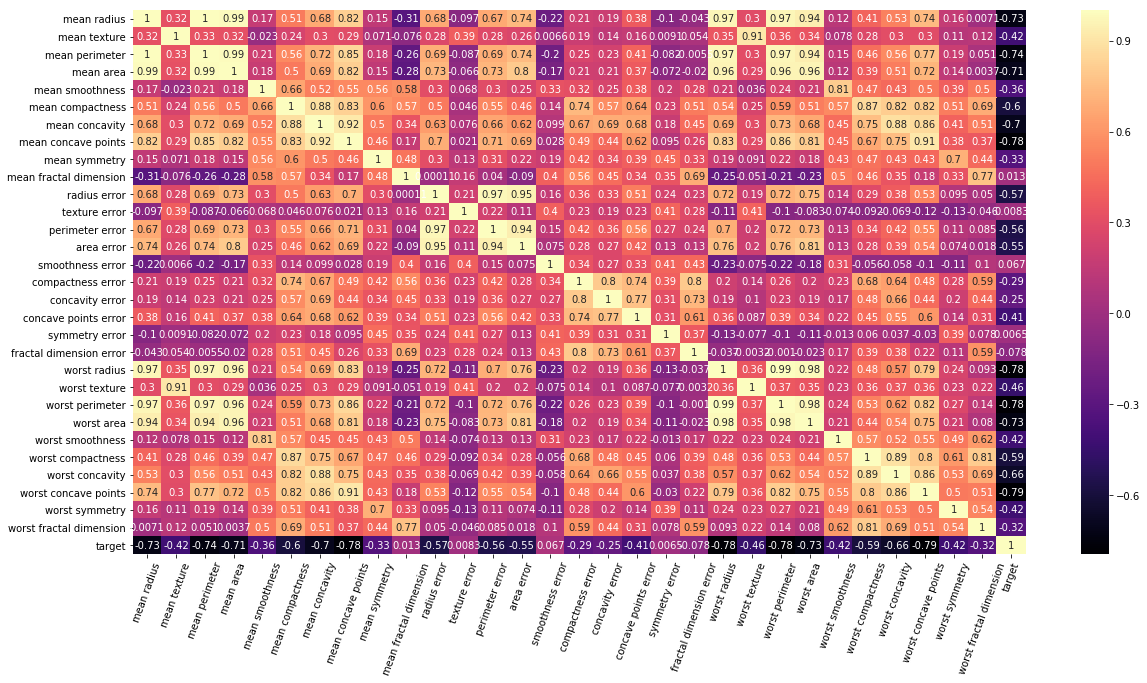

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(cancerdf.corr(), annot= True, cmap='magma')
plt.xticks(rotation=70)

# 1 - Using SVM

# Model Training 

In [102]:
X = cancerdf.drop(['target'], axis=1)
y = cancerdf['target']

In [103]:
#X.head()
from sklearn.model_selection import train_test_split

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [105]:
from sklearn.svm import SVC

In [106]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [107]:
svc = SVC()

In [108]:
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# Model Evaluation 


In [110]:
pred = svc.predict(X_test)

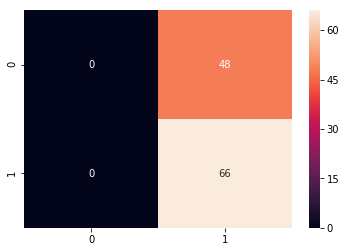

In [119]:
#print(confusion_matrix(y_test, pred))
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True)

we can see that 48 samples have been misclassified which is terrible so lets improve our model

In [121]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00        48
        1.0       0.58      1.00      0.73        66

avg / total       0.34      0.58      0.42       114



C:\Users\sohai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Improving the SVM model - 1

Scaling the features

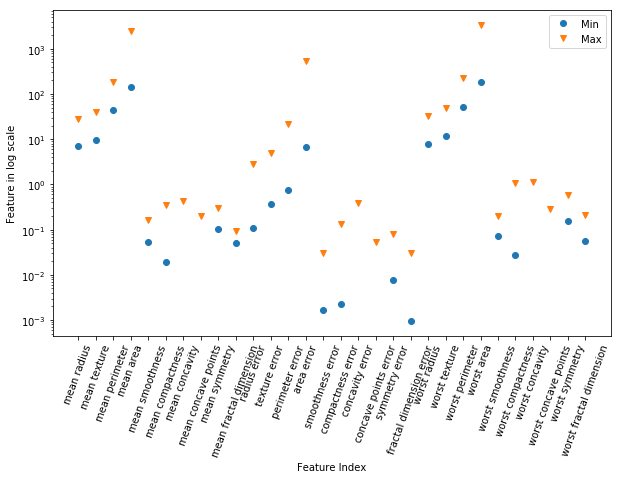

In [24]:
plt.figure(figsize=(10,6))
plt.plot(X_train.min(axis=0), 'o', label='Min')
plt.plot(X_train.max(axis=0), 'v', label='Max')
plt.xlabel('Feature Index')
plt.ylabel('Feature in log scale')
plt.yscale('log')
plt.xticks(rotation=70)
plt.legend()

In [85]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = cancerdf.columns[:-1])
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=5)

In [86]:
#from sklearn import preprocessing
#min_train = X_train.min()
#range_train =  (X_train-min_train).max()

In [87]:
#X_train_scaled = (X_train-min_train)/range_train

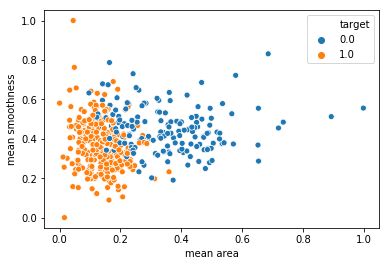

In [88]:
sns.scatterplot(data=X_train, x='mean area', y='mean smoothness', hue=y_train)

In [89]:
#min_test = X_test.min()
#range_test =  (X_test-min_test).max()
#X_test_scaled = (X_test-min_test)/range_test

Now, i am gonna train my SVM model again, but on scaled data this time!

In [90]:
svc.fit(X_train, y_train)
pred = svc.predict(X_test)

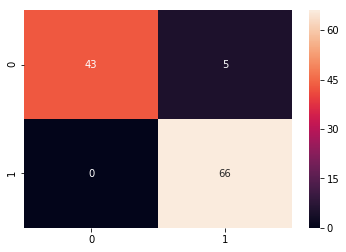

In [91]:
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True)

Way better result, 5 misclassified samples only!!!

In [101]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

        0.0       1.00      0.90      0.95        48
        1.0       0.93      1.00      0.96        66

avg / total       0.96      0.96      0.96       114



# Improving the SVM model - 2

Now, I will be optimizing the C and GAMMA parameters for better accuracy!

In [93]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']} 

In [94]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True)

In [95]:
grid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [96]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [97]:
grid_pred = grid.predict(X_test)

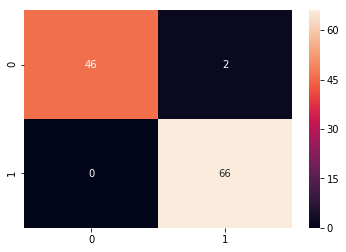

In [98]:
cm = confusion_matrix(y_test, grid_pred)
sns.heatmap(cm, annot=True)

In [99]:
print(classification_report(y_test, grid_pred))

             precision    recall  f1-score   support

        0.0       1.00      0.96      0.98        48
        1.0       0.97      1.00      0.99        66

avg / total       0.98      0.98      0.98       114



# 2 - Using KNN

# Model Training

In [122]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [123]:
cancerdf.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [124]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

In [125]:
#scaler.fit(cancerdf.drop('target', axis=1))

In [126]:
#scaled_features = scaler.transform(cancerdf.drop('target', axis=1))

In [127]:
#scaled_cancerdf = pd.DataFrame(scaled_features, columns=cancerdf.columns[:-1])

In [128]:
#scaled_cancerdf.head()

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [130]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [131]:
pred = knn.predict(X_test)

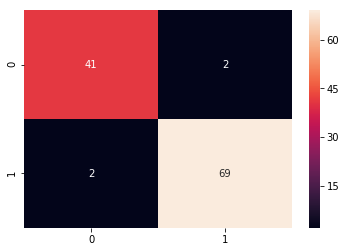

In [132]:
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True)

In [133]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

        0.0       0.95      0.95      0.95        43
        1.0       0.97      0.97      0.97        71

avg / total       0.96      0.96      0.96       114



Lets try out different value K and see how good or bad it performs

In [134]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

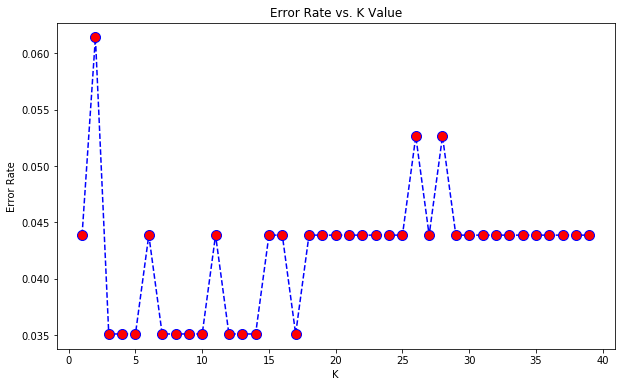

In [135]:
plt.figure(figsize=[10,6])
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Lets try K = 15

In [136]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

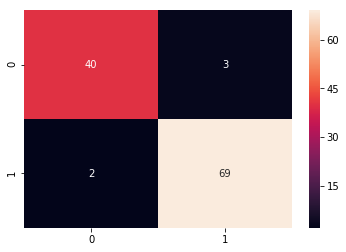

In [137]:
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True)

In [138]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

        0.0       0.95      0.93      0.94        43
        1.0       0.96      0.97      0.97        71

avg / total       0.96      0.96      0.96       114



Just a slight improvement

Accuracy of Training and Testing set

In [139]:
training_accuracy = []
test_accuracy = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

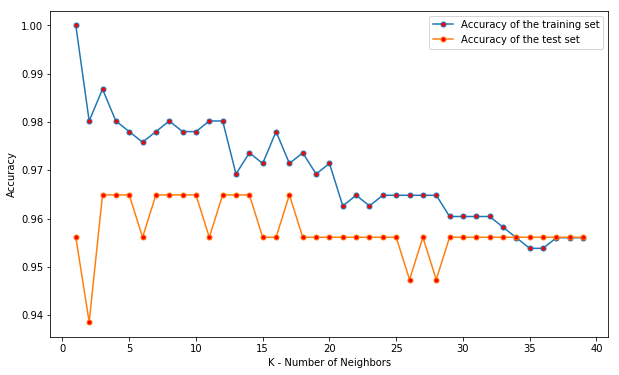

In [140]:
plt.figure(figsize=[10,6])
plt.plot(range(1,40),training_accuracy, marker='o',markerfacecolor='red', markersize=5, label='Accuracy of the training set')
plt.plot(range(1,40),test_accuracy, marker='o',markerfacecolor='red', markersize=5, label='Accuracy of the test set')

plt.xlabel('K - Number of Neighbors')
plt.ylabel('Accuracy')
plt.legend()

Let's try K=13 now

In [145]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
pred  = knn.predict(X_test)
print('Accuracy of KNN with K=13 on training set - {:.3f}'.format(knn.score(X_train, y_train)))
print('Accuracy of KNN with K=1 on testing set - {:.3f}'.format(knn.score(X_test, y_test)))



Accuracy of KNN with K=13 on training set - 0.969
Accuracy of KNN with K=1 on testing set - 0.965


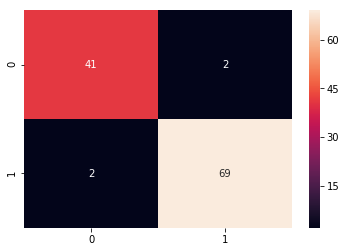

In [146]:
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True)

# 3 - Using RandomForest

# Model Training

In [147]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 100)

In [148]:
forest.fit(X_train, y_train)
print('Accuracy of RandomForest on training set - {:.3f}'.format(forest.score(X_train, y_train)))
print('Accuracy of RandomForest on testing set - {:.3f}'.format(forest.score(X_test, y_test)))

Accuracy of RandomForest on training set - 1.000
Accuracy of RandomForest on testing set - 0.965


In [149]:
n_features = X.shape[1]

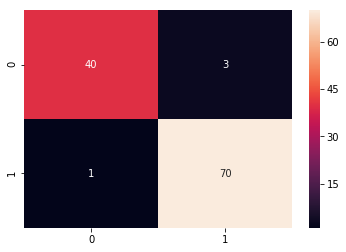

In [151]:
pred = forest.predict(X_test)
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True)

In [152]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

        0.0       0.98      0.93      0.95        43
        1.0       0.96      0.99      0.97        71

avg / total       0.97      0.96      0.96       114



Text(0, 0.5, 'Features')

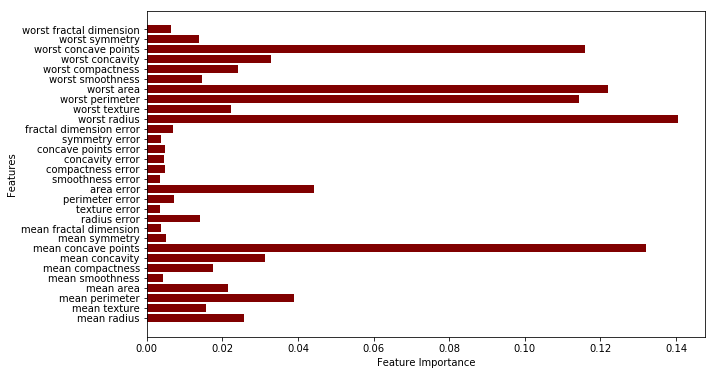

In [63]:
plt.figure(figsize=(10,6))
n_features = X.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center', color='maroon')
plt.yticks(np.arange(n_features),cancerdf.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Features')

# 4 - Logistic Regression  

# Model Training

In [153]:
from sklearn.linear_model import LogisticRegression
log_Reg = LogisticRegression()

In [154]:
log_Reg.fit(X_train, y_train)
print('Accuracy of Logistic Regression on training set - {:.3f}'.format(log_Reg.score(X_train, y_train)))
print('Accuracy of Logistic Regression on testing set - {:.3f}'.format(log_Reg.score(X_test, y_test)))

Accuracy of Logistic Regression on training set - 0.969
Accuracy of Logistic Regression on testing set - 0.974


In [155]:
log_Reg.fit(X_train, y_train)
log_Reg.score(X_test, y_test)

0.9736842105263158

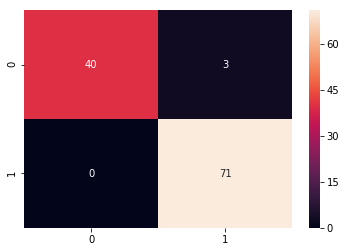

In [156]:
pred = log_Reg.predict(X_test)
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True)

In [157]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

        0.0       1.00      0.93      0.96        43
        1.0       0.96      1.00      0.98        71

avg / total       0.97      0.97      0.97       114

